In [1]:
# Import all the important libraries
import numpy as np
import numba as nb 
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import matplotlib

%matplotlib inline
from ipywidgets import interact

from sys_pde_no_growth import *

In [2]:
# Define all the system params
sys_params = np.zeros(16)
sys_params[0] = 0.2 # D_b
sys_params[1] = 1 # D_i
sys_params[2] = 1/5 # d_b
sys_params[3] = 1/10 # d_i
sys_params[4] = 1 # d_s
sys_params[5] = 1/8 # d_l
sys_params[6] = 1.4 # a_b_s
sys_params[7] = 1 # a_b_l
sys_params[8] = 0.08 # a_l_s
sys_params[9] = 0.7 # b_0
sys_params[10] = 0.2 #K_i
sys_params[11] = 1 # K_l
sys_params[12] = 0.1 # K_s
sys_params[13] = 2 # Hill coefficient (ask David)
sys_params[14] = 1 # A - pSmad edge effects
sys_params[15] = 0.1 # \sigma - pSmad edge effects

In [3]:
# Define all the simulations params
sol_params = np.zeros(10)
sol_params[0] = 0.01 # dt 
sol_params[1] = 1 # dx
sol_params[2] = 400/sol_params[1] #Lx
sol_params[3] = 400/sol_params[1] #Ly
sol_params[4] = 100/sol_params[1] # Radius of cell colony
sol_params[5] = 150/sol_params[0] # Total time, T
sol_params[6] = 0.5/sol_params[0] # Delta t (snapshot saving time)
sol_params[7] = 8/sol_params[0] # Cell Colony starts growing then (early migratory cells)
sol_params[8] = 0.25*sol_params[0] # Cell colony growth rate
sol_params[9] = 0 # pSmad edge-activation

In [4]:
# Get the initial conditions
array_b, array_i, array_s, array_l = create_IC_1(sys_params, sol_params)

In [5]:
data_b_time, data_i_time, data_s_time, data_l_time = run_and_save_sys(array_b, array_i, array_s, array_l, 
                                                                      sys_params, sol_params)

In [6]:
Lx, Ly = int(sol_params[2]), int(sol_params[3])
X_indices = np.repeat(np.arange(Lx), repeats=Ly).reshape((Lx, Ly))
Y_indices = X_indices.copy().T

In [7]:
# Set the image path
IMG_PATH = "NoGrowth_edge/" if sol_params[9] else "NoGrowth_no_edge/"

In [8]:
### Make movies for every species
fig, axes = plt.subplots(2, 2, figsize=(8, 8), dpi=300, subplot_kw={"aspect":"equal"})
norm = matplotlib.colors.Normalize(vmin=0, vmax=1) 
level_boundaries = np.linspace(0.0, 1.0, 100)

cmap1 = plt.cm.Blues
cbar1 = fig.colorbar(
        ScalarMappable(norm=norm, cmap=cmap1),
        boundaries=level_boundaries,
        values=(level_boundaries[:-1] + level_boundaries[1:]) / 2,
        ax=axes[0,0]
    )
cbar1.ax.set_ylabel(r'$c/c_{max}$', rotation=270, fontsize = 15, labelpad=15)

cmap2 = plt.cm.Greens
cbar2 = fig.colorbar(
        ScalarMappable(norm=norm, cmap=cmap2),
        boundaries=level_boundaries,
        values=(level_boundaries[:-1] + level_boundaries[1:]) / 2,
        ax=axes[1,0]
    )
cbar2.ax.set_ylabel(r'$c/c_{max}$', rotation=270, fontsize = 15, labelpad=15)

cmap3 = plt.cm.Purples
cbar3 = fig.colorbar(
        ScalarMappable(norm=norm, cmap=cmap3),
        boundaries=level_boundaries,
        values=(level_boundaries[:-1] + level_boundaries[1:]) / 2,
        ax=axes[0,1]
    )
cbar3.ax.set_ylabel(r'$c/c_{max}$', rotation=270, fontsize = 15, labelpad=15)

cmap4 = plt.cm.Reds
cbar4 = fig.colorbar(
        ScalarMappable(norm=norm, cmap=cmap4),
        boundaries=level_boundaries,
        values=(level_boundaries[:-1] + level_boundaries[1:]) / 2,
        ax=axes[1,1]
    )
cbar4.ax.set_ylabel(r'$c/c_{max}$', rotation=270, fontsize = 15, labelpad=15)
fig.tight_layout()

# Plot for all times
for index in range(0, int(sol_params[5]/sol_params[6]), 10):

    BMP_max, BMP_min = np.max(data_b_time), np.min(data_b_time)
    img1 = data_b_time[index]/BMP_max
    cont1 = axes[0,0].contourf(X_indices, Y_indices, img1,
                               origin="lower", vmin=0.0, vmax=1.0, cmap=cmap1)
    axes[0,0].set_title("BMP")

    BMPi_max, BMPi_min = np.max(data_i_time), np.min(data_i_time)
    img2 = data_i_time[index]/BMPi_max
    cont2 = axes[1,0].contourf(X_indices, Y_indices, img2, 
                               origin="lower", vmin=0.0, vmax=1.0, cmap=cmap2)
    axes[1,0].set_title("BMPi")

    pSmad_max, pSmad_min = np.max(data_s_time), np.min(data_s_time)
    img3 = data_s_time[index]/pSmad_max
    cont3 = axes[0,1].contourf(X_indices, Y_indices, img3,
                               origin="lower",vmin=0.0, vmax=1.0, cmap=cmap3)
    axes[0,1].set_title("pSmad")

    Lmx1a_max, Lmx1a_min = np.max(data_l_time), np.min(data_l_time)
    img4 = data_l_time[index]/Lmx1a_max
    cont4 = axes[1,1].contourf(X_indices, Y_indices, img4, 
                               origin="lower", vmin=0.0, vmax=1.0, cmap=cmap4)
    axes[1,1].set_title("Lmx1a")

    plt.suptitle("Concentration profiles at time = {}".format(np.round(index*sol_params[0]*sol_params[6], 3)))
    fig.tight_layout()
    plt.savefig(IMG_PATH+"time_snaps/{}.jpeg".format(index), dpi=600)
    axes[0,0].clear()
    axes[0,1].clear()
    axes[1,0].clear()
    axes[1,1].clear()

plt.close();

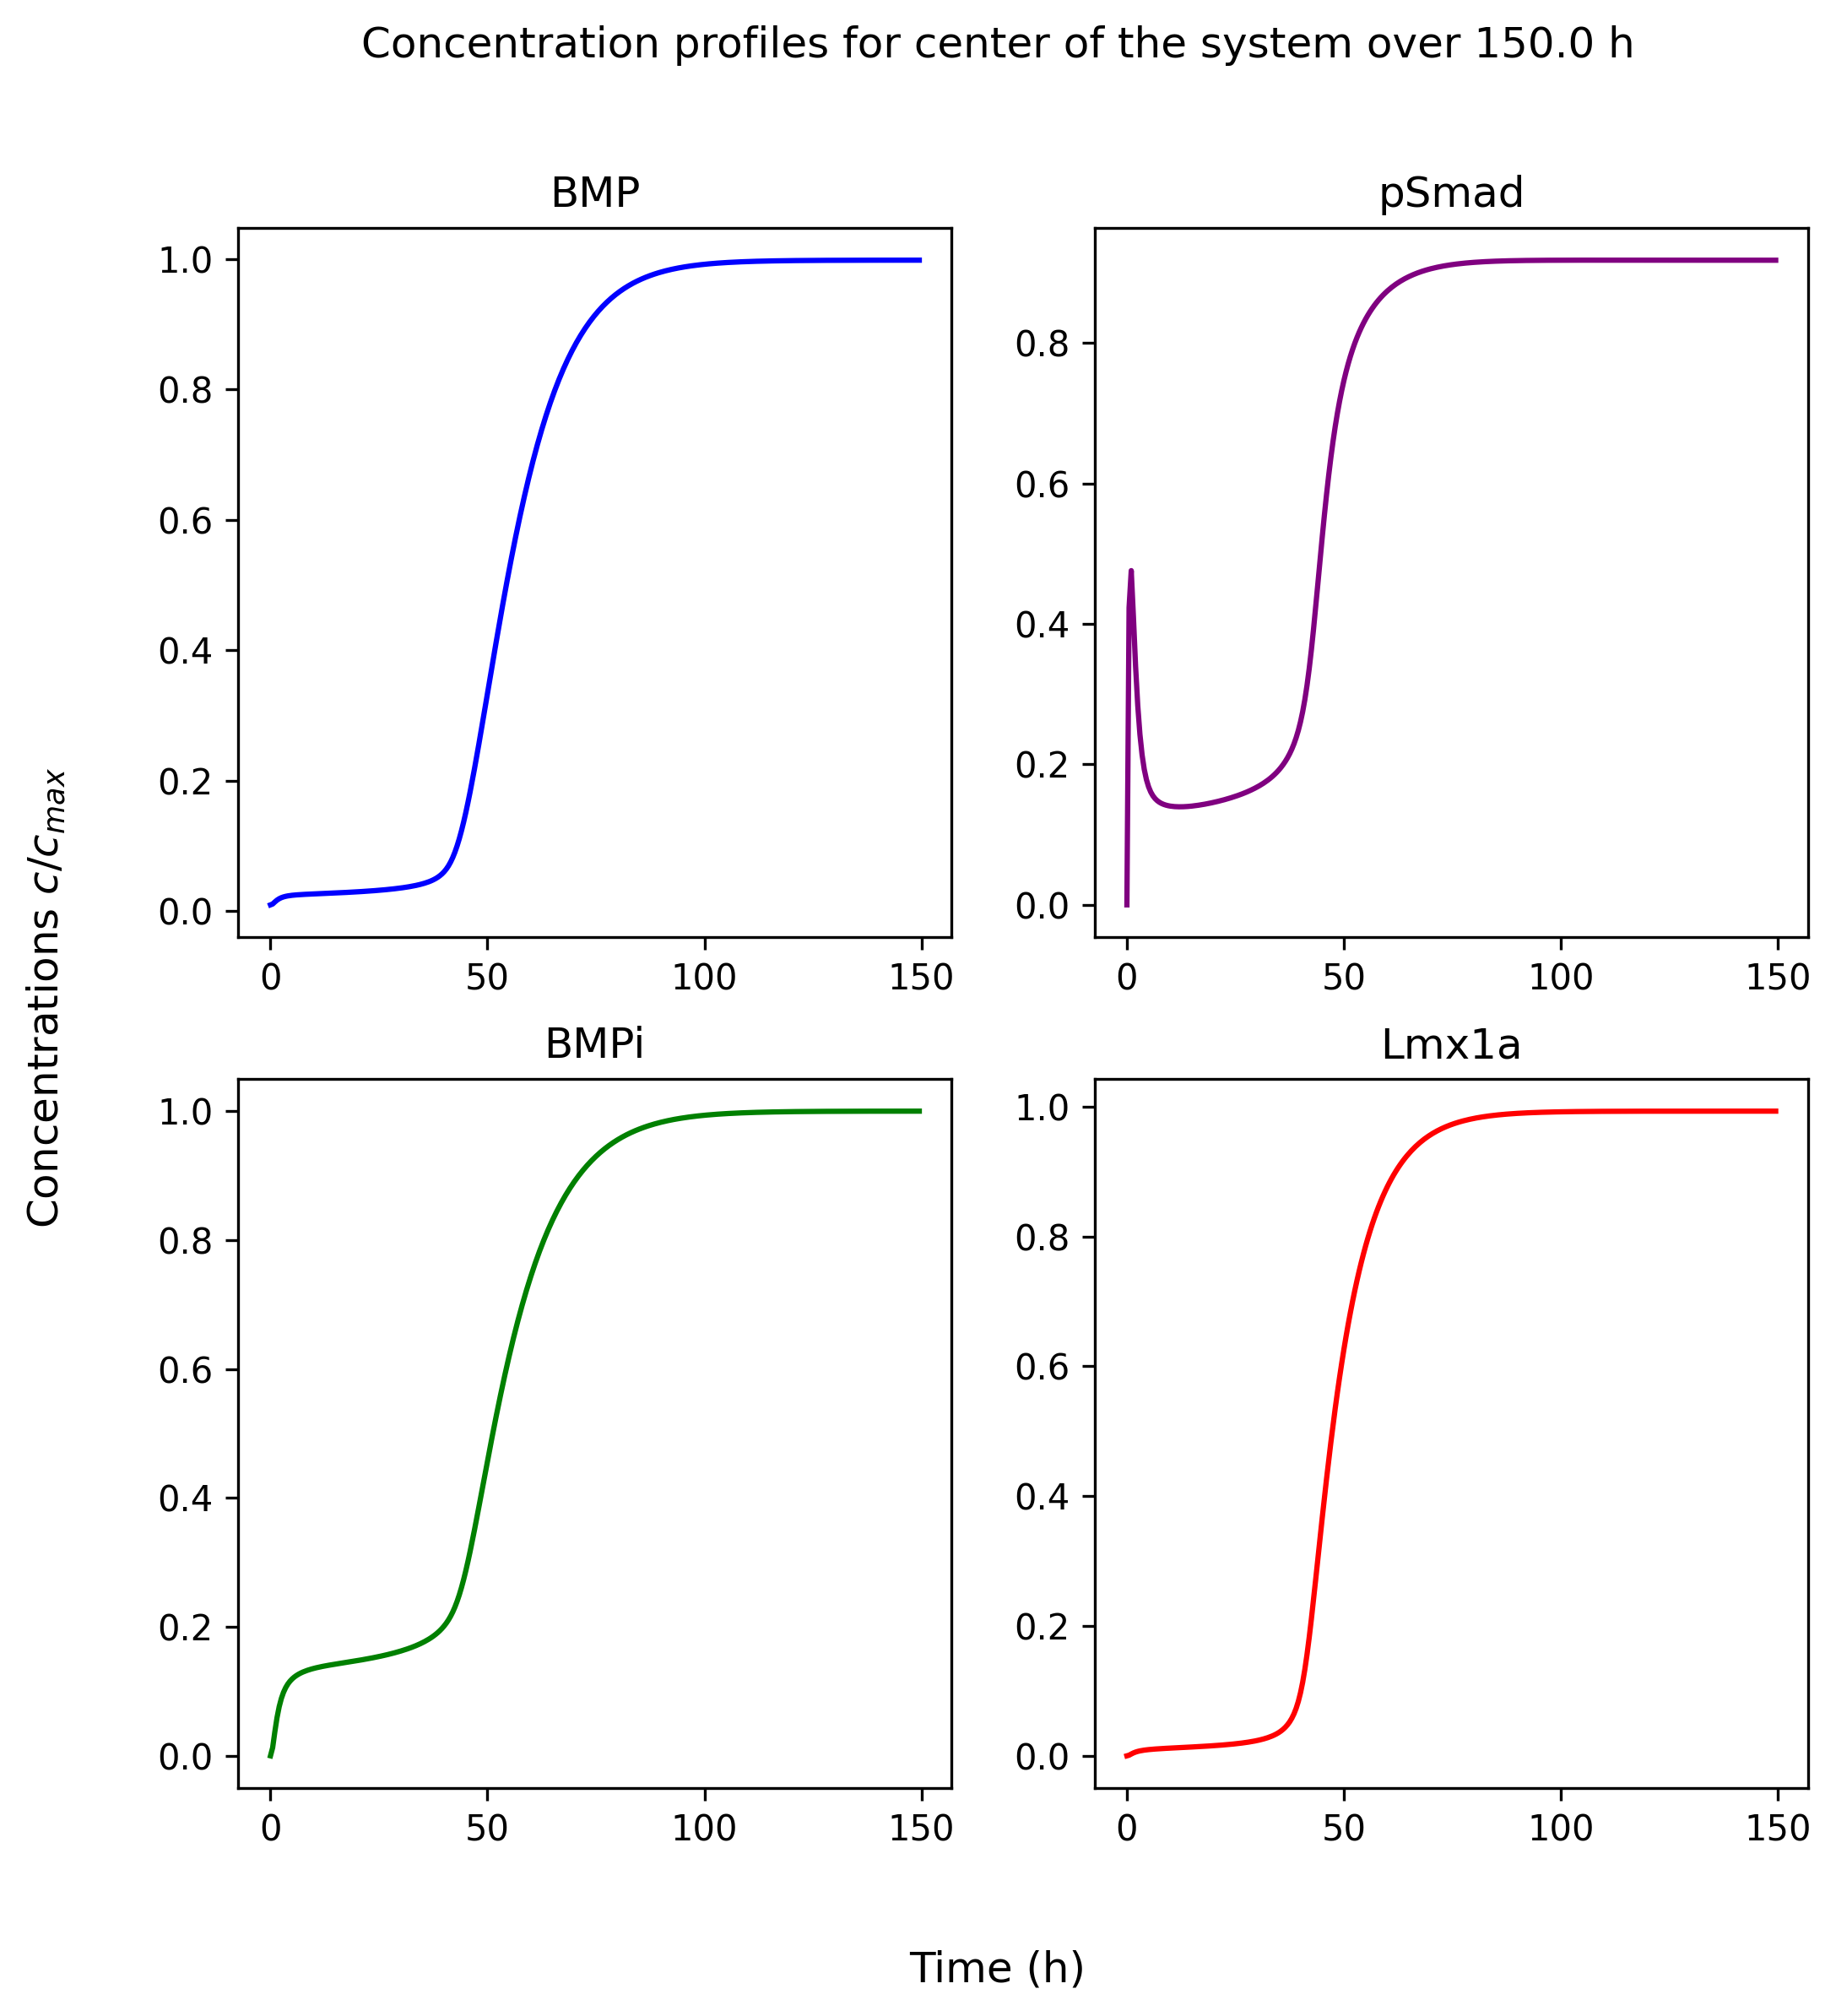

In [9]:
# Plot all the conncs as a function of time over one axis from the center
fig, axes = plt.subplots(2, 2, figsize=(8, 8), dpi=300)
Lx, Ly = int(sol_params[2]), int(sol_params[3])
R = int(sol_params[4])
b_concs_slice_t = data_b_time[:, Lx//2, Ly//2]/np.max(data_b_time)
i_concs_slice_t = data_i_time[:, Lx//2, Ly//2]/np.max(data_i_time)
s_concs_slice_t = data_s_time[:, Lx//2, Ly//2]/np.max(data_s_time)
l_concs_slice_t = data_l_time[:, Lx//2, Ly//2]/np.max(data_l_time)

delta_T = data_b_time.shape[0]
axes[0,0].plot(np.arange(delta_T)[:]*sol_params[0]*sol_params[6], b_concs_slice_t, color = "Blue")
axes[0,0].set_title("BMP")
axes[1,0].plot(np.arange(delta_T)[:]*sol_params[0]*sol_params[6], i_concs_slice_t, color = "Green")
axes[1,0].set_title("BMPi")
axes[0,1].plot(np.arange(delta_T)[:]*sol_params[0]*sol_params[6], s_concs_slice_t, color = "Purple")
axes[0,1].set_title("pSmad")
axes[1,1].plot(np.arange(delta_T)[:]*sol_params[0]*sol_params[6], l_concs_slice_t, color = "Red")
axes[1,1].set_title("Lmx1a")
fig.supylabel(r'Concentrations $c/c_{max}$')
fig.supxlabel('Time (h)')
plt.suptitle("Concentration profiles for center of the system over {} h".format(sol_params[5]*sol_params[0]))
plt.savefig(IMG_PATH+"Conc_center_end_time.jpeg", dpi=600);

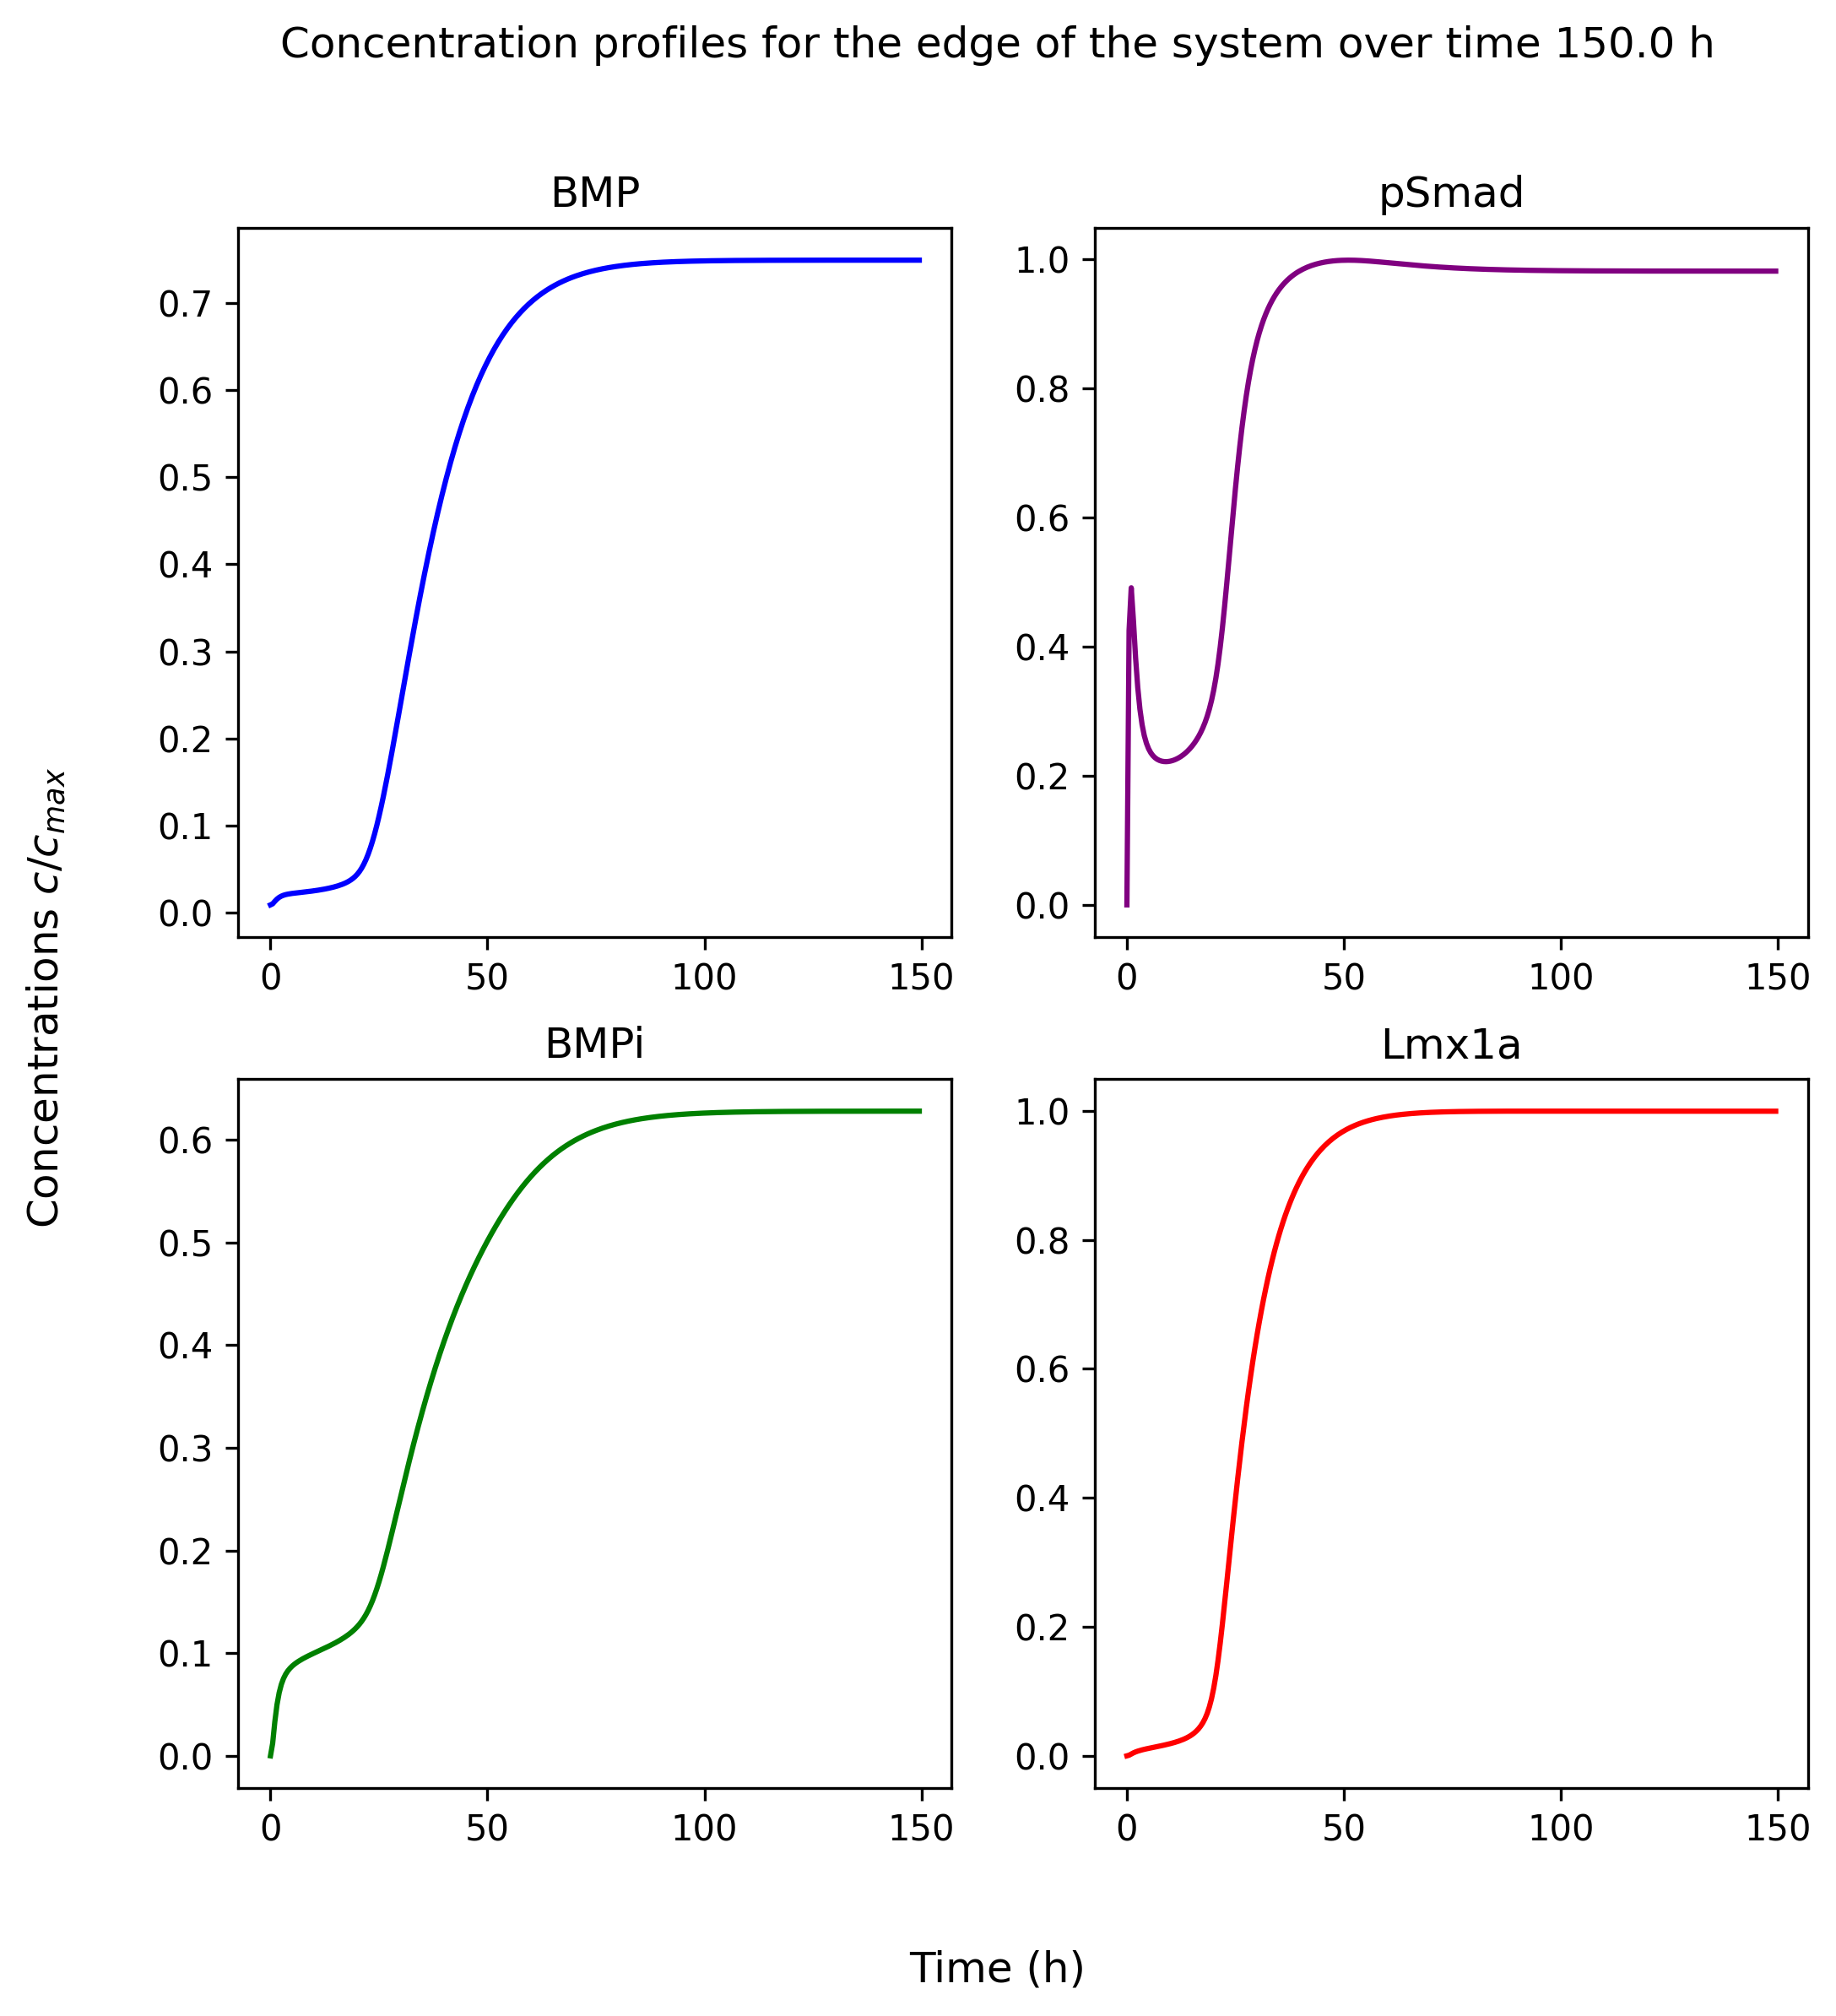

In [10]:
# Plot all the conncs as a function of time over one axis from the center
fig, axes = plt.subplots(2, 2, figsize=(8, 8), dpi=300)
Lx, Ly = int(sol_params[2]), int(sol_params[3])
R = int(sol_params[4])
b_concs_slice_t = data_b_time[:, Lx//2+R-1, Ly//2]/np.max(data_b_time)
i_concs_slice_t = data_i_time[:, Lx//2+R-1, Ly//2]/np.max(data_i_time)
s_concs_slice_t = data_s_time[:, Lx//2+R-1, Ly//2]/np.max(data_s_time)
l_concs_slice_t = data_l_time[:, Lx//2+R-1, Ly//2]/np.max(data_l_time)

delta_T = data_b_time.shape[0]
axes[0,0].plot(np.arange(delta_T)[:]*sol_params[0]*sol_params[6], b_concs_slice_t, color = "Blue")
axes[0,0].set_title("BMP")
axes[1,0].plot(np.arange(delta_T)[:]*sol_params[0]*sol_params[6], i_concs_slice_t, color = "Green")
axes[1,0].set_title("BMPi")
axes[0,1].plot(np.arange(delta_T)[:]*sol_params[0]*sol_params[6], s_concs_slice_t, color = "Purple")
axes[0,1].set_title("pSmad")
axes[1,1].plot(np.arange(delta_T)[:]*sol_params[0]*sol_params[6], l_concs_slice_t, color = "Red")
axes[1,1].set_title("Lmx1a")
fig.supylabel(r'Concentrations $c/c_{max}$')
fig.supxlabel('Time (h)')
plt.suptitle("Concentration profiles for the edge of the system over time {} h".format(sol_params[5]*sol_params[0]))
plt.savefig(IMG_PATH+"Conc_edge_end_time.jpeg", dpi=600);

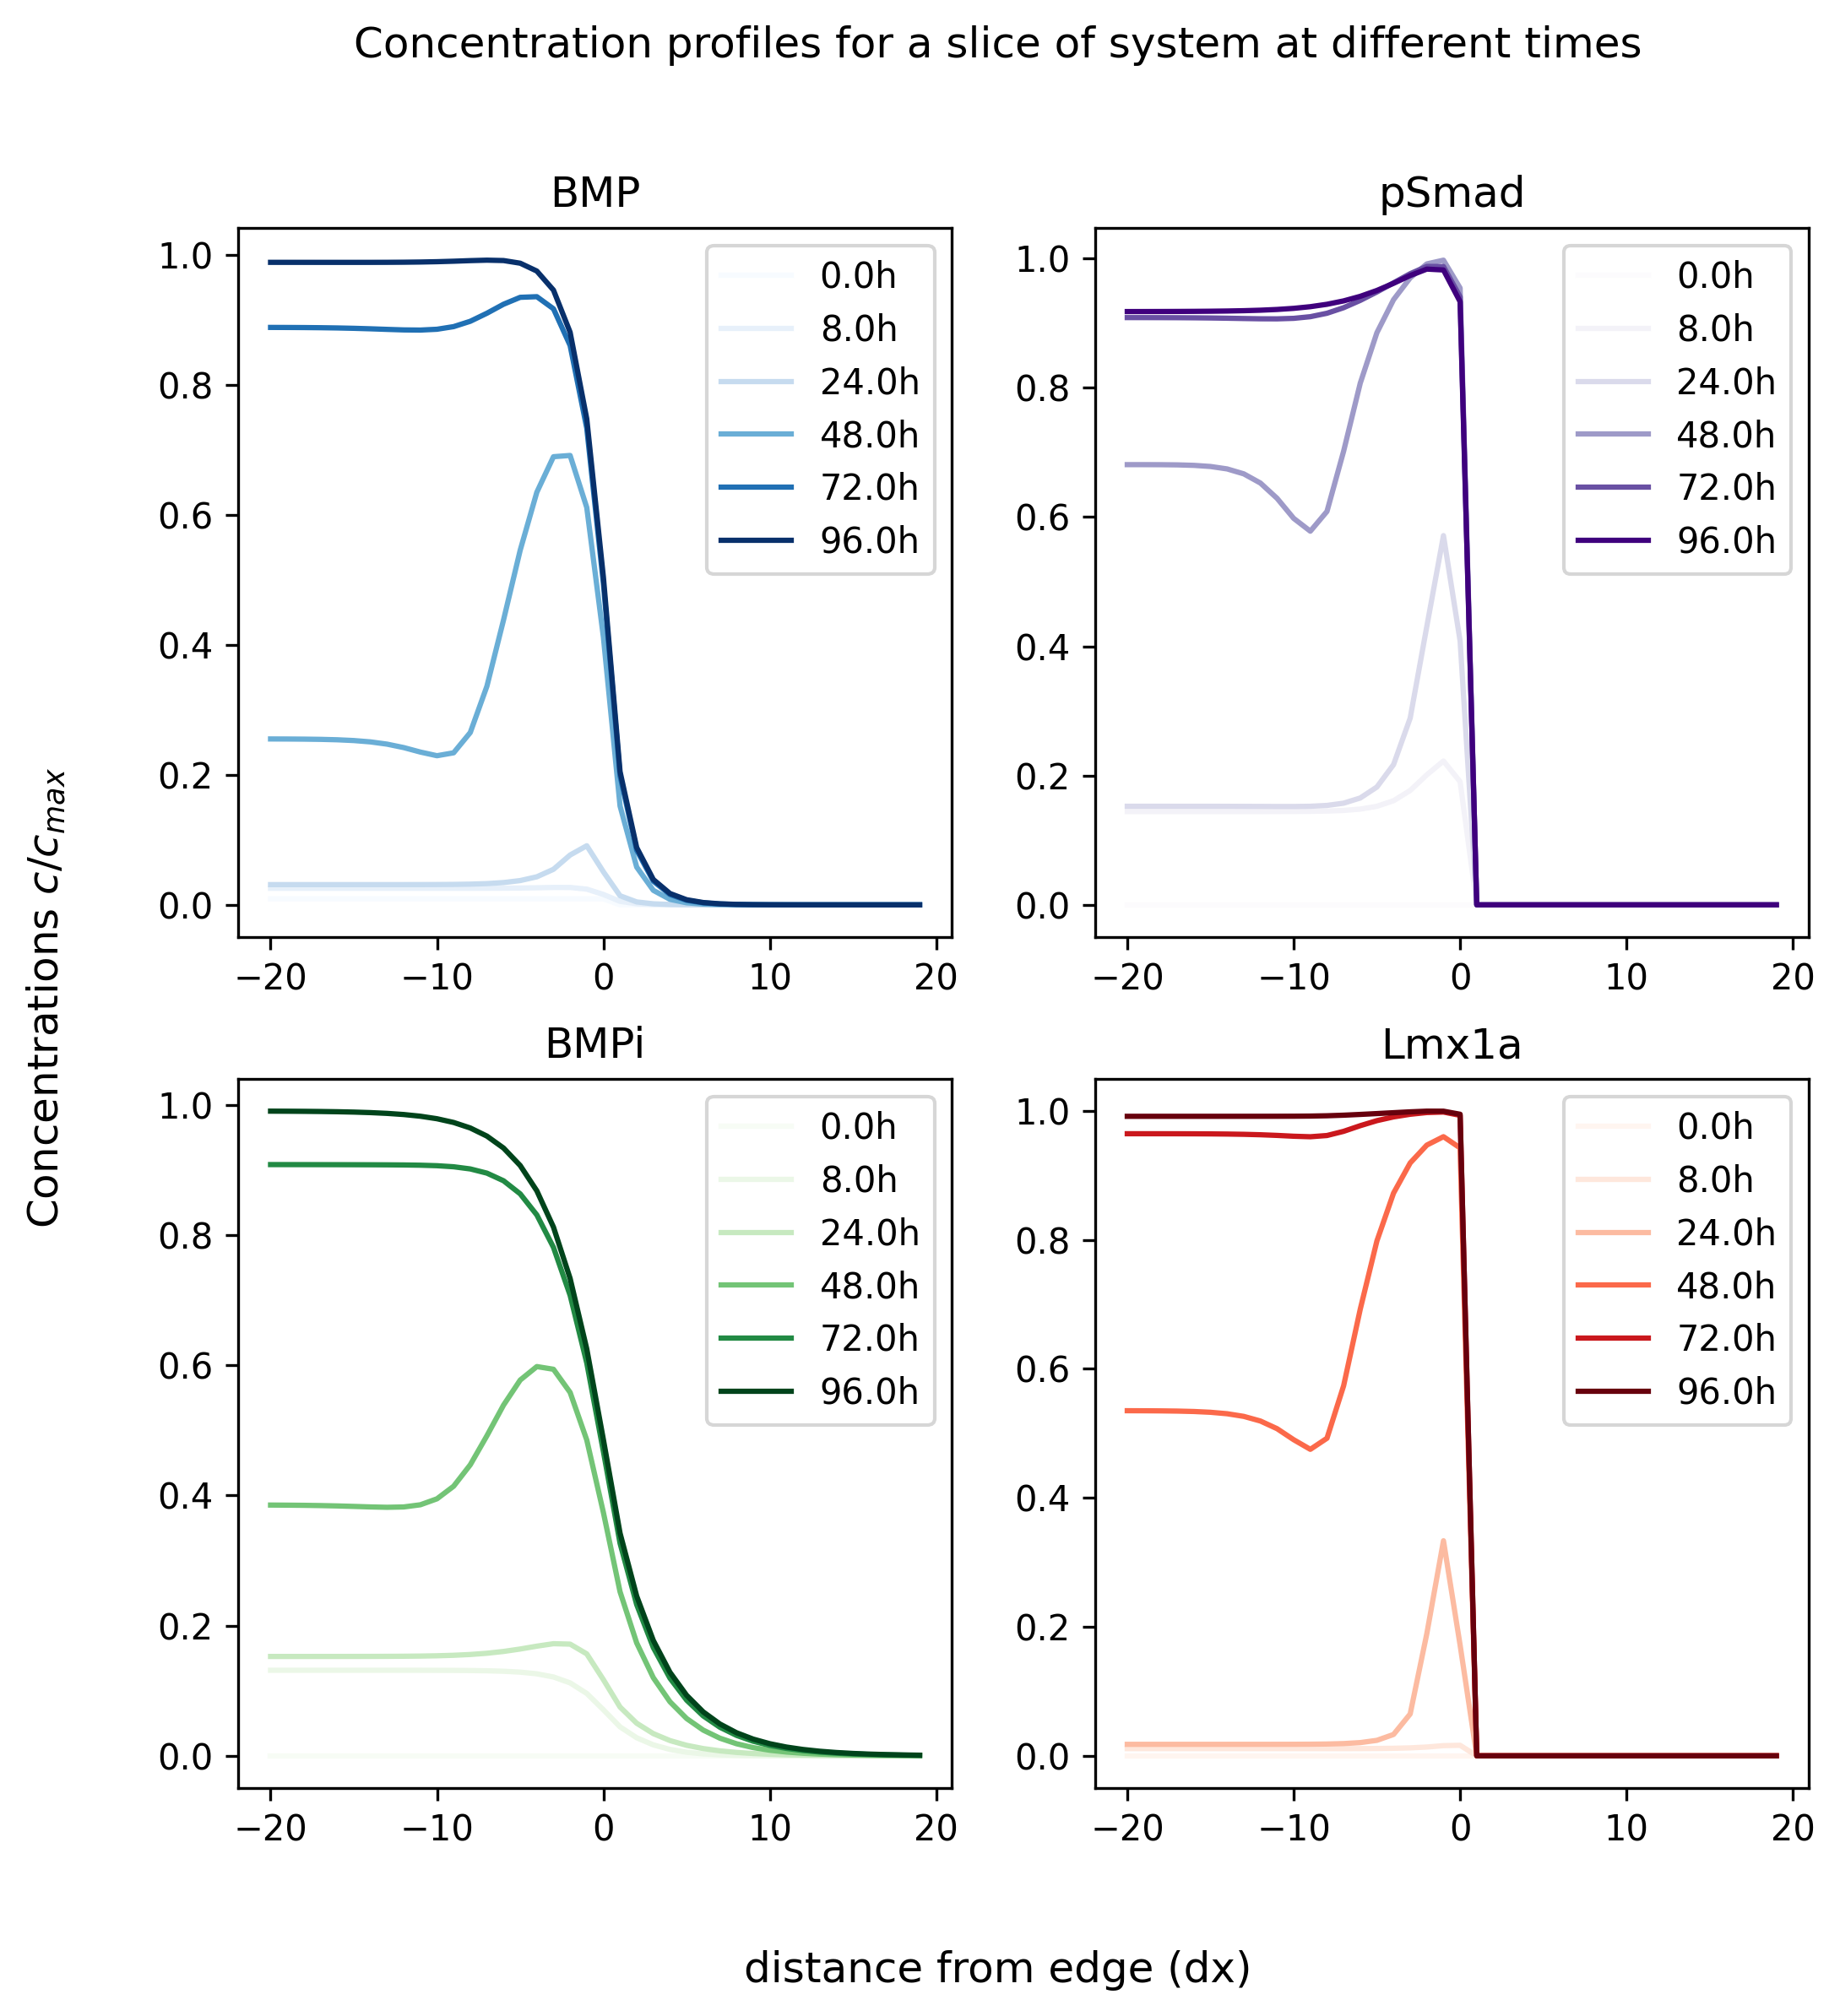

In [11]:
# Plot all the concs as a function of space over one axis from the center
fig, axes = plt.subplots(2, 2, figsize=(8, 8), dpi=300)
Lx, Ly = int(sol_params[2]), int(sol_params[3])
R = int(sol_params[4])
Tlen = sol_params[5]/sol_params[6]

T_points = np.array([0, 16, 48, 96, 144, 192])

for i in T_points:
    b_concs_slice_x = data_b_time[i][(Lx//2+R-20):(Lx//2+R+20), Ly//2]/np.max(data_b_time)
    i_concs_slice_x = data_i_time[i][(Lx//2+R-20):(Lx//2+R+20), Ly//2]/np.max(data_i_time)
    s_concs_slice_x = data_s_time[i][(Lx//2+R-20):(Lx//2+R+20), Ly//2]/np.max(data_s_time)
    l_concs_slice_x = data_l_time[i][(Lx//2+R-20):(Lx//2+R+20), Ly//2]/np.max(data_l_time)


    axes[0,0].plot(np.arange(40) - 20, b_concs_slice_x, color = cmap1(norm(i/T_points[-1]))
                   , label="{}h".format(sol_params[6]*sol_params[0]*i))
    axes[0,0].set_title("BMP")
    axes[1,0].plot(np.arange(40) - 20, i_concs_slice_x, color = cmap2(norm(i/T_points[-1]))
                   , label="{}h".format(sol_params[6]*sol_params[0]*i))
    axes[1,0].set_title("BMPi")
    axes[0,1].plot(np.arange(40) - 20, s_concs_slice_x, color = cmap3(norm(i/T_points[-1]))
                   , label="{}h".format(sol_params[6]*sol_params[0]*i))
    axes[0,1].set_title("pSmad")
    axes[1,1].plot(np.arange(40) - 20, l_concs_slice_x, color = cmap4(norm(i/T_points[-1]))
                   , label="{}h".format(sol_params[6]*sol_params[0]*i))
    axes[1,1].set_title("Lmx1a")

axes[0,0].legend()
axes[1,0].legend()
axes[0,1].legend()
axes[1,1].legend()
fig.supylabel(r'Concentrations $c/c_{max}$')
fig.supxlabel('distance from edge (dx)')
plt.suptitle("Concentration profiles for a slice of system at different times")
plt.savefig(IMG_PATH+"Conc_slice_over_time.jpeg", dpi=600);